# Fit a Polynomial

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

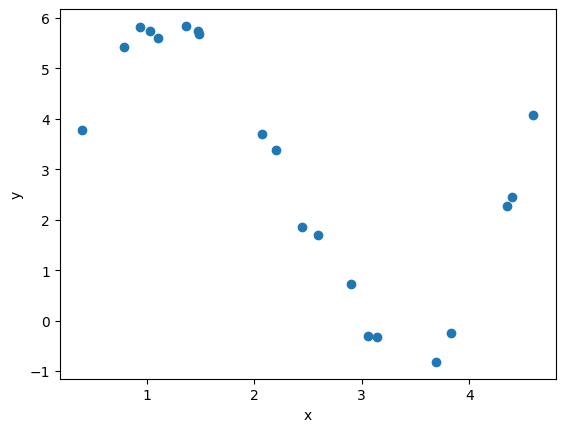

In [5]:
url = 'https://raw.githubusercontent.com/ajn313/NYU2023SummerML1/main/Day3/polyfit_data.csv'
df = pd.read_csv(url)
x = df['x'].values
y = df['y'].values
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Exercice :
1) Compute the Design matrix :
$ \begin{bmatrix} 1 & x_{1} & x_{1}^2 & \cdots & x_{1}^M \\ 1 & x_{2} &
    x_{2}^2 & \cdots & x_{2}^M \\ \vdots & & \ddots & & \vdots \\ 1 & x_{N} & x_{N}^2 & \cdots & x_{N}^M \end{bmatrix}$

2) Compute the Least-Square solution : $\mathbf{w} = (X^TX)^{-1}X^TY$

3) Compute the MSE

4) Make a prediction for xplt = np.linspace(0, 5, 100) and plot your polynomial over the data points

5) Try to find the "best" value for M

0.01330517511683373


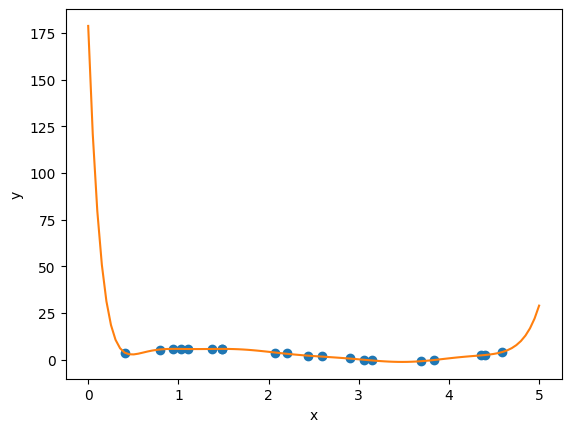

In [23]:
# Choose any integer value for M
M = 13


# TODO: 1) complete this function to return the Design matrix
def design_matrix(x, M):
    exponents = np.arange(0, M + 1)
    d = x[:, None] ** exponents[None, :]
    return d
    # ones = np.ones((len(x), 1))
    # x = x.reshape(-1, 1);
    
    # d = np.hstack((ones, x))

    # for i in range(2, M + 1):
    #     newX = x ** i;
    #     d = np.hstack((d, newX))

    # return d

# compute the design matrix of x
X = design_matrix(x, M)
# remember to reshape y to a column vector
y = y.reshape(-1, 1)

# TODO: 2) compute w using the least-square solution above (you can use np.linalg.pinv)
w = np.linalg.pinv(X) @ y

# TODO: 3) compute the MSE
yHat = X @ w
MSE = np.mean((y - yHat) ** 2)
print(MSE)

# TODO 4) make a prediction over "new" data and plot your polynomial fit
xplt = np.linspace(0, 5, 100)
matrix = design_matrix(xplt, M)
yplt = matrix @ w

# plot your polynomial fit
plt.plot(x,y,'o')
plt.plot(xplt, yplt, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Bonus :

Reproduce your code with sklearn !

In [ ]:
from sklearn import linear_model

# TODO: Bonus

# create a regression model
reg = linear_model.LinearRegression(fit_intercept=False)

# fit the model
reg.fit(X, y)

# use the model to predict
yhat = reg.predict(X)

# plot the same as above (use Xplt as input to your model)
plt.plot(x, y, 'o')
plt.plot(xplt, yplt)

In [21]:
# TODO 5) find the best value for M

# create a set of M values to test
Ms_test = np.arange(1, 21)
mse_s = np.zeros((Ms_test.shape[0], 1))

for i, M in enumerate(Ms_test):
    # - compute Design matrix
    d = design_matrix(x, M)
    # - compute least-square solution (w)
    wp = (np.linalg.inv(d.transpose() @ d) @ d.transpose()) @ y
    w = np.linalg.pinv(d) @ y
    # - compute the mse on the predicted data and store it: mse_s[i] = 
    yHat = d @ w
    MSE = np.mean((y - yHat) ** 2)
    mse_s[i] = MSE

# find the best M (the value of M associated with the lowest MSE) 
# use  
print("Best M:", np.argmin(mse_s) + 1)

Best M: 12
